# **Lab2.2 : Image Enhancement with Statistical Operation**

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

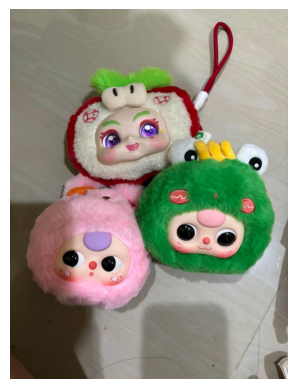

In [ ]:
### START CODE HERE ###
img = cv2.imread("/content/babythreeAndKimmon.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(image)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [ ]:
### START CODE HERE ###
# function plot_histogram
# จะ return ในรูปของ 1D-array โดยเก็บในช่วงของ pixel count / color scale (0->255)
def plot_histogram(image):
    # Hist B, G, R
    ## cv2.calcHist([image], [channels], Mask, HistSize, range)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # print(hist.shape)
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

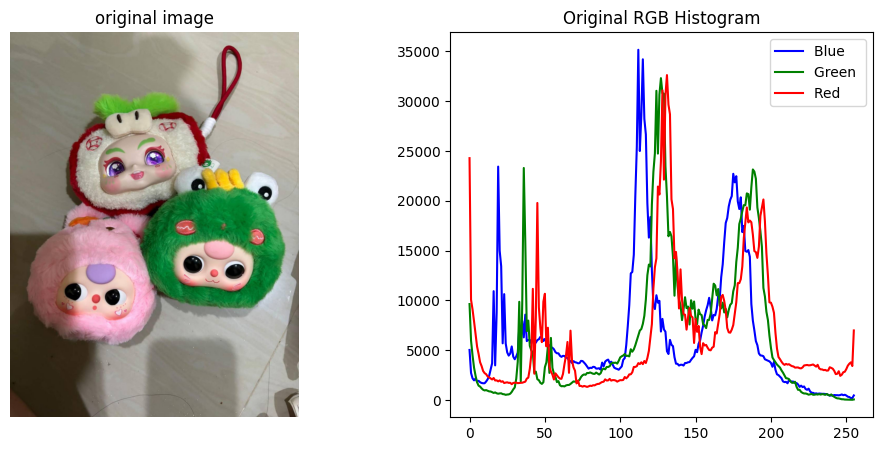

In [ ]:
### START CODE HERE ###
# split color image
def split_color_image(image):
  ch_B, ch_G, ch_R = image[:, :, 2], image[:, :, 1], image[:, :, 0]
  colors = ['Blue', 'Green', 'Red']
  lis_ch = [ch_B, ch_G, ch_R]
  results = zip(lis_ch, colors)

  for ch_color, color in results:
    hist = plot_histogram(ch_color)
    axs[1].plot(hist, color = color, label = f'{color} ')

# Create a figure with two subplots (original image, Original RGB Histogram)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Display Original image
axs[0].imshow(image)
axs[0].set_title('original image')
axs[0].axis('off')

# Display Original RGB Histogramh bj
axs[1].set_title('Original RGB Histogram')
split_color_image(image)

# show label
axs[1].legend()
plt.show()
### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

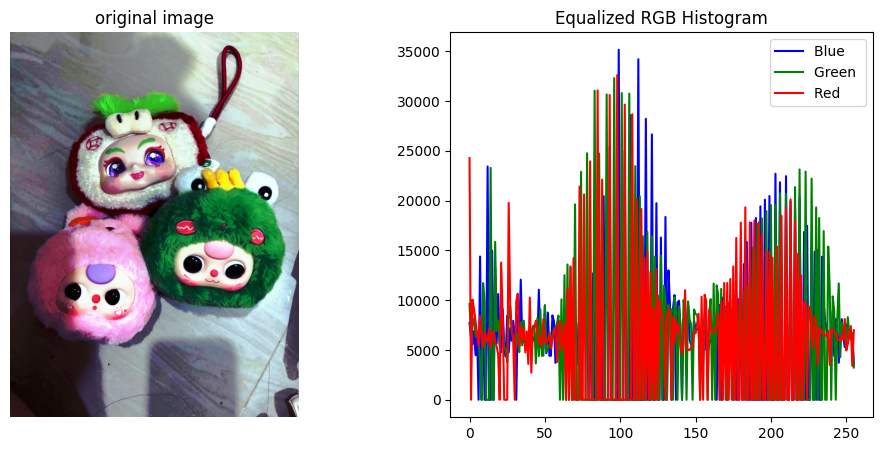

In [ ]:
# Image Enhancement with Statistical Operation
# Using Histogram Equalization
### START CODE HERE ###

# split color image
ch_B, ch_G, ch_R = image[:, :, 2], image[:, :, 1], image[:, :, 0]
colors = ['Blue', 'Green', 'Red']

# cv2.equalizeHist -> Histogram Equalization (กระจายเฉดสีให้เท่าๆกัน)
r_eq = cv2.equalizeHist(ch_R)
g_eq = cv2.equalizeHist(ch_G)
b_eq = cv2.equalizeHist(ch_B)
lis_ch_eq = [b_eq, g_eq, r_eq]

# Create a figure with two subplots (original image, Equalized RGB Histogram)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Display Original image
# transpose channels first -> channels last
axs[0].imshow(cv2.cvtColor(np.transpose(lis_ch_eq, (1, 2, 0)), cv2.COLOR_BGR2RGB))
axs[0].set_title('original image')
axs[0].axis('off')

# Display Original RGB Histogram
axs[1].set_title('Equalized RGB Histogram')
for i in range(len(lis_ch_eq)):
  hist = plot_histogram(lis_ch_eq[i])
  axs[1].plot(hist, color = colors[i], label = f'{colors[i]} ')

# แสดง label
axs[1].legend()
plt.show()

### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [ ]:
### START CODE HERE ###

img1 = cv2.imread("/content/babythreeAndKimmon.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("/content/image.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

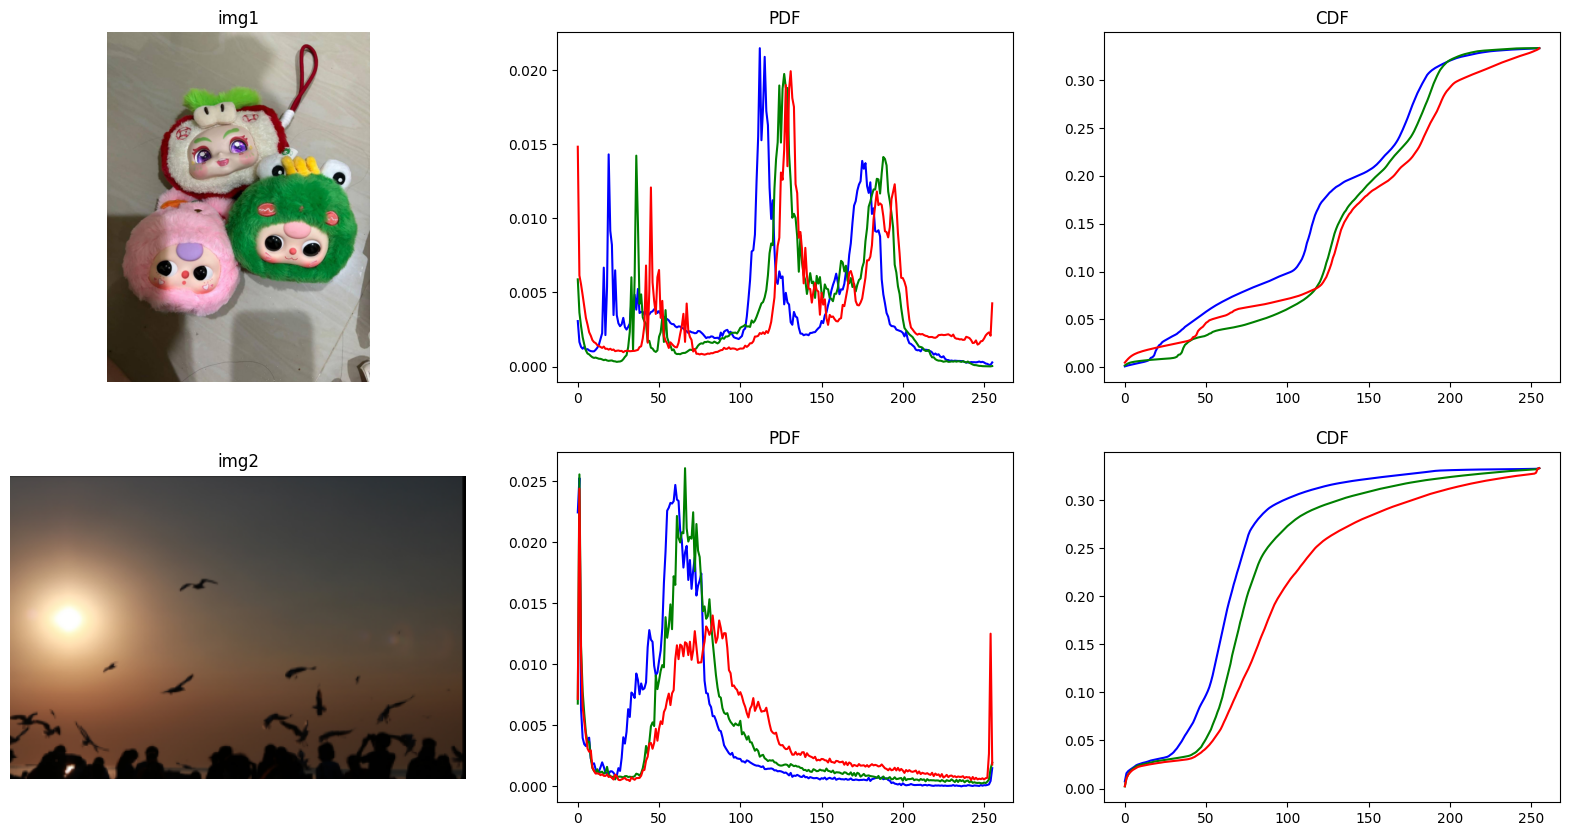

In [ ]:
### START CODE HERE ###
## pdf_split_color_image
def pdf_split_color_image(image, row, column):
  total_pix = image.shape[0]*image.shape[1]
  ch_B, ch_G, ch_R = image[:, :, 2], image[:, :, 1], image[:, :, 0]
  colors = ['Blue', 'Green', 'Red']
  lis_ch = [ch_B, ch_G, ch_R]
  results = zip(lis_ch, colors)

  for ch_color, color in results:
    hist = plot_histogram(ch_color)
    # pdf : ความถี่ที่สนใจ / ความถี่ทั้งหมด (hist/total_pix)
    axs[row][column].plot(hist/total_pix, color = color, label = f'{color} ')

## cdf_split_color_image
def cdf_split_color_image(image, row, column):
  total_pix = image.shape[0]*image.shape[1]
  ch_B, ch_G, ch_R = image[:, :, 2], image[:, :, 1], image[:, :, 0]
  colors = ['Blue', 'Green', 'Red']
  lis_ch = [ch_B, ch_G, ch_R]
  results = zip(lis_ch, colors)

  for ch_color, color in results:
    hist = plot_histogram(ch_color)
    # pdf : sum(ความถี่ที่สนใจก่อนหน้า) / ความถี่ทั้งหมด (np.cumsum(hist)/total_pix)
    axs[row][column].plot(np.cumsum(hist/total_pix)/3   , color = color, label = f'{color} ')


# Create a figure with two subplots (original image, Original RGB Histogram)
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Display image1
axs[0][0].imshow(img1)
axs[0][0].set_title('img1')
axs[0][0].axis('off')

# Display PDF histogram of image1
axs[0][1].set_title('PDF')
pdf_split_color_image(img1, row = 0, column = 1)

# Display Original RGB Histogramh bj
axs[0][2].set_title('CDF')
cdf_split_color_image(img1, row = 0, column = 2)

# Display Original image
axs[1][0].imshow(img2)
axs[1][0].set_title('img2')
axs[1][0].axis('off')

# Display Original RGB Histogramh bj
axs[1][1].set_title('PDF')
pdf_split_color_image(img2, row = 1, column = 1)

# Display Original RGB Histogramh bj
axs[1][2].set_title('CDF')
cdf_split_color_image(img2, row = 1, column = 2)

plt.show()

### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

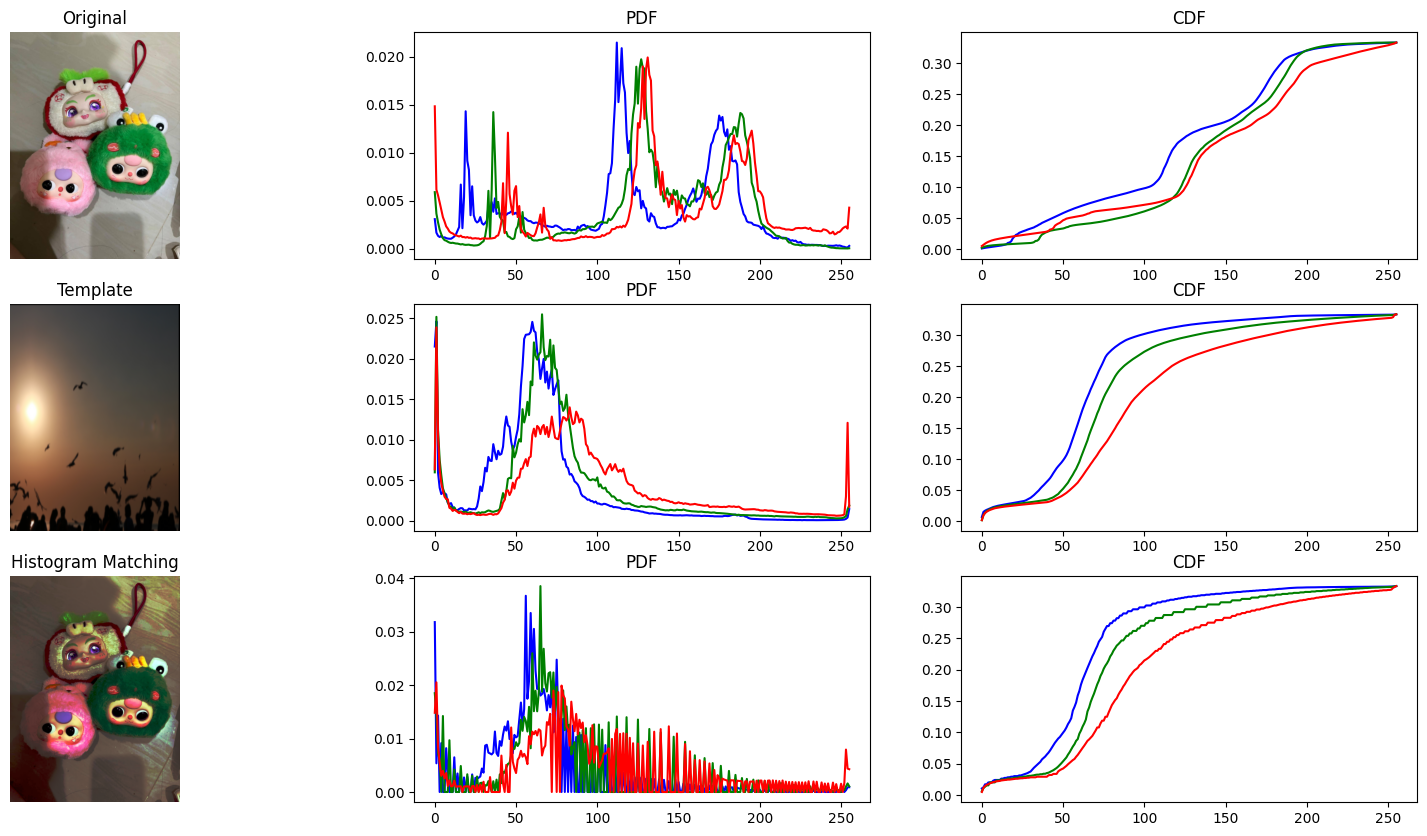

In [ ]:
def cdf_for_hist_match(image):
    hist = plot_histogram(image)
    pdf = (hist/(image.shape[0]*image.shape[1]))
    cdf = np.cumsum(pdf)
    return cdf

def create_lookup_table(input_image, template_image):
    # create lookup table [zeros array length 256]
    lookup_table = np.zeros(256)
    for inp_img_idx in range(len(lookup_table)) :
      # np.argmin : หา index ที่มีค่าที่น้อยที่สุดใน array นั้นๆและทำการ return index ออกมา
      lookup_idx = np.argmin(np.abs(template_image - input_image[inp_img_idx]))
      lookup_table[inp_img_idx] = lookup_idx
    return lookup_table

def histogram_matching(input_image, template_image):
  # image_hist_match : เปรียบเสมือนสร้างโครงสร้างของรูปภาพ ซึ่งในโครงสร้างนั้นจะยังไม่มีข้อมูล (data ใน array มีค่าเป็น 0)
  # โดยใช้ np.zeros_like(input_array) : สร้างโครงสร้างของ array ที่มี dimension เหมือนกับ input_array โดยค่าใน array จะเป็น 0
  image_hist_match = np.zeros_like(input_image)
  for i in range(3):
    ch_color_lookup_table = create_lookup_table(cdf_for_hist_match(input_image[:, :, i]), cdf_for_hist_match(template_image[:, :, i]))
    # cv2.LUT : ทำการ mapping lookup table
    image = cv2.LUT(input_image[:, :, i], ch_color_lookup_table)
    # print(image.shape)
    image_hist_match[:, :, i] = image
    # print(image_hist_match.shape)
  return image_hist_match

###################################################3
# histogram_matching(img1, img2)
# Create a figure with two subplots (original image, Original RGB Histogram)
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

# Display Original image
axs[0][0].imshow(img1)
axs[0][0].set_title('Original')
axs[0][0].axis('off')

# Display Original RGB Histogramh bj
axs[0][1].set_title('PDF')
pdf_split_color_image(img1, row = 0, column = 1)

# Display Original RGB Histogramh bj
axs[0][2].set_title('CDF')
cdf_split_color_image(img1, row = 0, column = 2)

# Display Original image
axs[1][0].imshow(img2)
axs[1][0].set_title('Template')
axs[1][0].axis('off')

# Display Original RGB Histogramh bj
axs[1][1].set_title('PDF')
pdf_split_color_image(img2, row = 1, column = 1)

# Display Original RGB Histogramh bj
axs[1][2].set_title('CDF')
cdf_split_color_image(img2, row = 1, column = 2)

#๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒๒

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
matched_image = histogram_matching(img1, img2)
axs[2][0].imshow(matched_image)
axs[2][0].set_title('Histogram Matching')
axs[2][0].axis('off')

# Display Original RGB Histogramh bj
axs[2][1].set_title('PDF')
pdf_split_color_image(matched_image, row = 2, column = 1)

# Display Original RGB Histogramh bj
axs[2][2].set_title('CDF')
cdf_split_color_image(matched_image, row = 2, column = 2)

plt.show()

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device. (ภาพดูสว่างหรือดูจางเพราะ histogram มีการกระจุกตัวเฉดสีของภาพมีน้อยนั่นเอง)
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be? (หากรูปภาพที่มี histogram ที่มีความกระจุกตัวนั้นจะสามารถแก้ไขได้โดยใช้รูปภาพ template ที่มีการกระจายของ histogram อย่างสม่ำเสมอในการ mapping เพื่อทำให้รูปภาพที่ทำการ matching นั้นมีเฉดสีที่เยอะขึ้นนั่นเอง )
3. How would we enhance an image having too bright in some area and too dark in another area? (Histogram Equalization : ในการกระจายความเข้มแสงเพื่อทำให้รูปภาพนั้นมีความสมดุลมากขึ้น)